**<h1 style="text-align: center;">🕵🏻 EDA on Vehicle Sales Data 🏎️</h1>**

## 👋🏼 **Introduction**

<p style="text-align: justify;">They are one of the leading car resellers in the US. They have chosen me as their data scientist so that I can analyze some data for them and give some business insights by which they can improve their sales. They have provided me with a dataset of vehicle sales data. They want to find some business insights from this dataset so that they can improve their sales in the market.</p>

## 🧿 **Objective**
 <p style="text-align: justify;">The sales of JJ motors have not been very good lately and hence they had to make some very hard business decisions of laying off people in many of their offices. And they are not happy with the performance for the past 4-5 years. Hence they want to study and analyze the market so that they can improve their sales and get back in the business. They have chosen a huge dataset for me, which has details about the car sales until the year 2015.
     
In their past survey, the people said that their customers were not happy with the options provided by them. So my plan is to focus on the preferences of the customers. This will help me really to get into the minds of the customers and understand what are they looking for in a car they are buying so that my company can use this data to polish their marketing and sales techniques. I will be conducting Exploratory Data Analysis (EDA) on the Vehicle Sales Data dataset and try to get an insight of the dataset. I have some business questions in mind which will help the company in improving their sales. Let's see how we can find the answers to these questions. I will be loading the dataset and then try to find any relationships, trends and patterns between among the various features of the dataset. Also, I will be trying to find answers to the below set of questions.
 
 </p>

**About the data**  
This dataset contains 16 columns. This data set is from Kaggle. You can [**click here**](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/code) to view the dataset on kaggle.

## ***Table of Content***

##### ⬇ [**Importing Libraries**](#library)
##### 📊 [**Importing Dataset**](#dataset)
##### 💭 [**My taughts on the dataset**](#thoughts)
##### 🧹 [**Data Cleaning**](#cleaning)
##### ❓ [**Business Questions**](#questions)
##### 💡 [**Conclusion**](#conclusion)






## ***Let's go....***

<a id='library'></a>
## ⬇ <span style="color: #20479b; font-weight: bold;">Importing Libraries</span>

I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [42]:
import pandas as pnds
import numpy as nmpi
import matplotlib.pyplot as ppt
import seaborn as sbrn
import plotly.express as epx
%matplotlib inline
from dateutil import parser
import datetime as dati
import plotly.graph_objs as grp_ob
import plotly.io as pio
pio.renderers.default = "jupyterlab"

This are the basic libraries I will be using for this pipeline. I am using pandas for the dataframe, numpy for all the calculations. matplotlib, plotly an seaborn I will be using to plot the graphs to better understand the graph. And I have also used dateutil to clean the datetime columns and covert it into a correct format which cleaning.

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [43]:
dataset = pnds.read_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/009. eda_on_ecommerce_dataset/dataset/car_prices.csv')

print("Dataframe rows.   :", len(dataset))
print("Dataframe cols.   :", len(dataset.columns))  
print("="*27)

dataset.head(5)

Dataframe rows.   : 558837
Dataframe cols.   : 16


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


I can see that we have 558837 rows in this dataset. There are 16 columns in total. I can see that there are very insightful data in this dataset. But the data does not look very clean. At this point, I can see VIN columns which I feel like its unnecessary and also `saledate` column does not look in the correct format. It has time zones and all are included in them. I think we might have to clean these columns. But let's explore the dataset further and see what we can do about these columns and others. 

<a id='exploration'></a>
## 🗺️ <span style="color: #20479b; font-weight: bold;">Exploring the dataset</span>

After loading the dataset into the DataFrame `dataset`, I will check the `dataset` shape using the `.shape` attribute.

In [44]:
dataset.shape

(558837, 16)

As you can see above there are 5558837 rows and 16 columns.
This is a good start for us a as there is a lot of data for us to analyse.

I will use `.info` method to get a shortsummary of the DataFrame. It will include the number of non-null values, Data Types, and Memory Usage etc.

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


I can see that the 
- count in the **Non-Null** column is less than the total columns i.e. 558837
- that means that there are many NULL values in the dataset. 
- which we will take care in the data cleaning part.
- Looking at the datatype, I can see that datatype looks fine, except for the saledate column. It is of object datatype. I will change the datatype of this column.
- The size of our dataset is arround 68.2 MegaBytes.
- There are 3 datatypes in this dataframe i.e. float, int and object.

I will use `dtypes` attribute to get the datatypes of the columns.  
I will also get the same details in `.info()` attribute above. But I like to view it seperately we get a getter understanding.

In [46]:
dataset.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

I want to get a statistics of the dataframe using describe
- It will provide us various functions such as mean, count, Standard Deviation, Min, Max and percentiles.
- I have used **Transpose** here as I want the columns of my DataFrame as the index.
- This especially helps when I have many numrical columns.

In [47]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


From the above table, we can get very insightful details of the columns. Let's go one column at a time.

1. **Year**:
   - I can see that this dataset's sales details dated from the year 1982 to 2015.
   - Even if the data has old data, the old sales details are not many. The mean column says that rows are mostly around 2010. This means this is comparatively recent data.
   - The average year of sale is approximately 2010, indicating that the dataset predominantly consists of relatively recent vehicle sales.

2. **Condition**:
   - The condition is rated from 1 to 50 in this dataset. 1 being low and 50 being the best condition.
   - Average is 30, which means that most vehicles are moderately maintained.

4. **Odometer**:
   - Based on the average values, it looks like most of the vehicles run for long miles on average they run for 68,320 miles.
   The minimum value is 1, which suggests that there are vehicles as well.
   - The 50th percentile suggests that half of the vehicles run less than 52,254 miles.

5. **MMR (Which stands for Market Median Retail)**:
   - There are records for MMR 25 dollars as well, which might be because the vehicle is old or also if it is not maintained well.
   - On average, the MMR is around 13000 dollars.
   - The median suggests that in half of the data, the MMR is below 12,250 dollars.

6. **Selling Price**:
   - One thing I noticed something odd is that the minimum selling price is 1 dollar.
   - I need to check which records have selling price as 1.
   - median values suggest that for almost half of the data, the selling price is less than 12100 dollars.

Overall, this summary provides valuable insights into the distribution and characteristics of the vehicle sales dataset, including information about the years of sale, vehicle conditions, mileage, market median retail prices, and selling prices.

Now, I will check if there are any null values

In [48]:
print(" "*30)
print("Dataframe rows :", len(dataset))
print(" "*30)
print("="*30)

dataset.isnull().sum()

                              
Dataframe rows : 558837
                              


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Now I am going to check how much percentage of the columns are null. If they are negligible percentage then we can just drop the columns. Otherwise I will fill the na values with the meaninfull values.

In [49]:
null_percentage = {}
for column in dataset:
    null_percentage[column] = round(( ( dataset[column].isnull().sum() ) / len(dataset)) * 100,2)
np_dataset = pnds.DataFrame( list( null_percentage.items() ),  columns=[  'column_name'  , 'null_percentage' ])
np_dataset

,column_name,null_percentage
0,year,0.00
1,make,1.84
2,model,1.86
3,trim,1.91
4,body,2.36
5,transmission,11.69
6,vin,0.00
7,state,0.00
8,condition,2.12
9,odometer,0.02


If you see the above table, the max null percentage is for the column. Transmission is around 11 per cent. It is difficult to guess the transmision of the cars because there is no engine details in this data. And all the other columns have null percentages less than 3. So if you see the size of the data it is not very huge. And if we start guess and filling the data, we might loose quality in the data. I want to preserve the quality and hence I can drop these rows. And also, 

As the null percentage is negligible when compared to the size of the dataset, we can drop these null columns. 

Let me check if there are unwanted records in our dataset now.

In [50]:
dataset["state"].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

I can see a lot of rows with unwanted data here. We have to delete these error data.

Checking for transmission column now

In [51]:
dataset["transmission"].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

Generally there are two types that are automatic and manual, but in this dataset, I can see that In the transmission column there are, **nan**, **sedan** and **Sedan** entries which are definetly data errors.
Now similar to transmission column I think that it is better to drop these columns as we loose the data quality if we fill these entries.

In [52]:
dataset['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In make columns see a lot of entries where the name is same but they are in different case, To better represent the data and study from it will essential for me to clean this data, and connect the make names in the column. I am thinking of making this all small. And also for records where there are additional letters I will replace the columns with standard name.

Let me view the data sorting in alphabetical order, so that I can recognize which are the similar names which I can rename.

In [53]:
sorted(dataset['make'].astype(str).unique())

['Acura',
 'Aston Martin',
 'Audi',
 'BMW',
 'Bentley',
 'Buick',
 'Cadillac',
 'Chevrolet',
 'Chrysler',
 'Daewoo',
 'Dodge',
 'FIAT',
 'Ferrari',
 'Fisker',
 'Ford',
 'GMC',
 'Geo',
 'HUMMER',
 'Honda',
 'Hyundai',
 'Infiniti',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Lamborghini',
 'Land Rover',
 'Lexus',
 'Lincoln',
 'Lotus',
 'MINI',
 'Maserati',
 'Mazda',
 'Mercedes-Benz',
 'Mercury',
 'Mitsubishi',
 'Nissan',
 'Oldsmobile',
 'Plymouth',
 'Pontiac',
 'Porsche',
 'Ram',
 'Rolls-Royce',
 'Saab',
 'Saturn',
 'Scion',
 'Subaru',
 'Suzuki',
 'Tesla',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'acura',
 'airstream',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chrysler',
 'dodge',
 'dodge tk',
 'dot',
 'ford',
 'ford tk',
 'ford truck',
 'gmc',
 'gmc truck',
 'honda',
 'hyundai',
 'hyundai tk',
 'jeep',
 'kia',
 'land rover',
 'landrover',
 'lexus',
 'lincoln',
 'maserati',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercury',
 'mitsubishi',
 'nan',
 'nissan

There are many entries which are very similar.

<a id='thoughts'></a>
## 💭 <span style="color: #20479b; font-weight: bold;">My thoughts on the dataset</span>

As per my initial Data Exploration,
- I can see that the dataset is huge with 558837 columns.
- This dataset consits of alot of null values which can be deleted considering the size of the data.
- VIN number is unique for each vahicle, hence it is not useful for me, hence I will drop the column.
- I also noticed that the datatype of `saledate` column is object, and it also can time and timezone which we may not need.
- `state` and `transmission` column has error data, which I can delete.



I will be following the below steps to 🧹 clean my data for further analysis.
1. ❎ Drop all the rows containing `null` values.
2. ❎ Drop columns `VIN`.
3. 🪛 Convert the saledate column to Datetime format.
4. 🪛 Add columns `sale_year` and  `sale_month` using the `saledate` column.
4. 🪛 Make column `make` all smalll.
5. 🪛 Replace the make error in make with the standard make name.
5. ❎ Drop the rows with error data from `state` and `transmission` columns.
6. ✅ Re-arranging the columns for better readablity. 

<a id='cleaning' ></a>
## 🧹 <span style="color: #20479b; font-weight: bold;">Data Cleaning</span>


1. **❎ Drop all the rows containing `null` values.**

You can see that the null_percentage for each column is negligible. The max is for Transmission is 11.69%, which is negligible when we consider the datasize, i.e. 558837 of data. Hence I will be droping the rows with null values.

In [54]:
dataset.dropna(inplace=True)

In [55]:
print(" "*30)
print("Dataset rows   :", len(dataset))
print("="*30)
print(" "*30)

dataset.isnull().sum()

                              
Dataset rows   : 472325
                              


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

According to me VIN number will not be useful at all for me because it is unique for all cars. It is better to delete it to reduce teh complexity of the dataset because it's not useful for my analysis.

2. **❎ Drop columns `VIN`**

In [56]:
dataset.drop("vin",axis=1,inplace=True)
dataset.sample(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
461623,2010,Cadillac,SRX,Luxury,SUV,automatic,ca,37.0,121779.0,gold,beige,skyhigh remarketing inc,11400.0,10700.0,Wed May 27 2015 05:00:00 GMT-0700 (PDT)
220691,2012,Ford,Edge,SEL,SUV,automatic,mi,25.0,84026.0,blue,gray,automobiles paille inc,17650.0,15900.0,Thu Feb 12 2015 01:30:00 GMT-0800 (PST)
261881,2014,Kia,Rio,LX,Sedan,automatic,nj,5.0,11758.0,white,black,kia motors america inc,11450.0,11300.0,Wed Feb 11 2015 01:30:00 GMT-0800 (PST)
12755,2010,Lincoln,MKX,Base,SUV,automatic,mn,34.0,46998.0,gray,black,select lane,17700.0,19500.0,Thu Dec 18 2014 10:30:00 GMT-0800 (PST)
31970,2013,Ford,Edge,Limited,SUV,automatic,mi,28.0,52268.0,black,black,ford motor credit company llc,17450.0,15100.0,Thu Jan 08 2015 09:00:00 GMT-0800 (PST)


3. **🪛 Convert the saledate column to Datetime format.**

Like I said before the sale date column in this format is very difficult to work with because if I want to filter the data or sort the data based on date then it will not be possible for me to do it accurately which this format. So I will clean it up using `dateutil.parser` package to clean it and convert it to the right datetime format. This module will automatically detect various formats and convert them for us. I will convert them to utc standard to maintain the uniformity.

In [57]:
dataset['saledatetime']  =    pnds.to_datetime( dataset['saledate' ].apply(parser.parse), utc=True )
dataset.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledatetime
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-14 20:30:00+00:00
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-28 20:30:00+00:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18 04:30:00+00:00


4. **🪛 Add columns `sale_year` and  `sale_month` using the `saledate` column.**

Now that I have got the datetime in a new column, I want to drop the older column. Then since time is not important to me I will move the data to the new column `saledate` and also divide `year` and `month`.

Simply, there are the steps.
1. drop the older  `saledate` column, 
2. create a new `saledate` column which will have only the saledate and remove the time as it is not important for us.
3. drop the `saledatetime`.
4. add `sale_date` and `sale_year` columns.

In [58]:
dataset.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledatetime
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-14 20:30:00+00:00


In [59]:
dataset.drop("saledate",axis=1,inplace=True)
dataset.sample(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledatetime
429986,2013,Nissan,Titan,SV,Crew Cab,automatic,ca,44.0,30882.0,gray,gray,nissan motor acceptance corporation,19950.0,23750.0,2015-05-25 22:30:00+00:00
64910,2009,Chevrolet,HHR,LT,Wagon,automatic,wi,22.0,100641.0,gray,gray,capital one auto finance,5375.0,4000.0,2014-12-31 02:00:00+00:00
65066,2011,BMW,X3,xDrive35i,SUV,automatic,oh,4.0,33831.0,black,black,crown motor co inc,30400.0,29250.0,2014-12-30 01:30:00+00:00


In [60]:
dataset["saledate"] = pnds.to_datetime(dataset["saledatetime"])

In [61]:
dataset.drop("saledatetime",axis=1,inplace=True)
dataset['sale_month'] = dataset['saledate'].dt.strftime('%B')
dataset['sale_year'] = dataset['saledate'].dt.year
dataset.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_month,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,December,2014
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,December,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,January,2015
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,January,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,December,2014


5. **🪛 Make column `make` all smalll**

Next, I will change the `make` column to all small letter to standardize them.

In [62]:
dataset['make'] = dataset['make'].str.lower()

6. **🪛 Replace the make error in make with the standard make name**

And we also saw that the data were the same makes but they have been updated as slightly different names. To standardize them,
Here I will replace the make names with standard ones.

In [63]:
dataset['make'] = dataset['make'].replace({'chev truck':'chevrolet','dodge tk':'dodge','ford tk':'ford','ford truck':'ford','gmc truck':'gmc','hyundai tk':'hyundai','land rover':'landrover',
                    'mazda tk':'mazda','mercedes-b':'mercedes','mercedes-benz':'mercedes','vw':'volkswagen'})
sorted(dataset['make'].astype(str).unique())

['acura',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'daewoo',
 'dodge',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'geo',
 'gmc',
 'honda',
 'hummer',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'kia',
 'lamborghini',
 'landrover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mercedes',
 'mercury',
 'mini',
 'mitsubishi',
 'nissan',
 'oldsmobile',
 'plymouth',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'volkswagen',
 'volvo']

make column looks so much better now.

7. **❎ Drop the rows with error data from `state` and `transmission` columns**

If I search each error entry and delete them it will take time. Since all the error records first 4 records are same I will filter them based on that and delete it.

In [64]:
dataset =  dataset[ ~dataset[ 'state'].str.startswith('3vwd'  )]
dataset.sample(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_month,sale_year
491841,2012,audi,A3,2.0T Premium,wagon,automatic,ca,49.0,16874.0,—,black,high bid trading co inc,16700.0,20000.0,2015-06-02 22:15:00+00:00,June,2015
459440,2007,chrysler,Sebring,Base,Sedan,automatic,va,19.0,195343.0,white,beige,virginia select auto,1450.0,1000.0,2015-05-27 19:05:00+00:00,May,2015
167401,2001,chevrolet,Silverado 1500,LS,Extended Cab,automatic,nc,26.0,147153.0,white,black,boyd chev buick gmc of emporia va inc,3500.0,2800.0,2015-01-18 17:00:00+00:00,January,2015
507150,2013,nissan,Altima,2.5,sedan,automatic,ca,37.0,58661.0,black,black,the hertz corporation,11850.0,11101.0,2015-06-08 22:30:00+00:00,June,2015
244990,2007,toyota,FJ Cruiser,Base,SUV,automatic,co,2.0,146509.0,red,black,ghent chevrolet cadillac,12150.0,12600.0,2015-02-02 20:00:00+00:00,February,2015


I feel like the order of the column is not so accurate, which is not good for reading. Hence I will rearrange the columns. This will make it easier for us to read.

In [65]:
rearranged_columns = ['year','make','model','trim','body','transmission','state','condition','color','interior','saledate','sale_year','sale_month','seller','sellingprice','mmr','odometer']
dataset = dataset[rearranged_columns]
dataset.head(5)

,year,make,model,trim,body,transmission,state,condition,color,interior,saledate,sale_year,sale_month,seller,sellingprice,mmr,odometer
0,2015,kia,Sorento,LX,SUV,automatic,ca,5.0,white,black,2014-12-16 04:30:00+00:00,2014,December,kia motors america inc,21500.0,20500.0,16639.0
1,2015,kia,Sorento,LX,SUV,automatic,ca,5.0,white,beige,2014-12-16 04:30:00+00:00,2014,December,kia motors america inc,21500.0,20800.0,9393.0
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,ca,45.0,gray,black,2015-01-14 20:30:00+00:00,2015,January,financial services remarketing (lease),30000.0,31900.0,1331.0
3,2015,volvo,S60,T5,Sedan,automatic,ca,41.0,white,black,2015-01-28 20:30:00+00:00,2015,January,volvo na rep/world omni,27750.0,27500.0,14282.0
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,gray,black,2014-12-18 04:30:00+00:00,2014,December,financial services remarketing (lease),67000.0,66000.0,2641.0


Dataset looks better now.

Just to verify let me just check the datatype of the dataset if it looks good.

In [66]:
dataset.dtypes

year                          int64
make                         object
model                        object
trim                         object
body                         object
transmission                 object
state                        object
condition                   float64
color                        object
interior                     object
saledate        datetime64[ns, UTC]
sale_year                     int32
sale_month                   object
seller                       object
sellingprice                float64
mmr                         float64
odometer                    float64
dtype: object

Looks fine now

<a id='questions'></a>  


## ❓ <span style="color: #20479b; font-weight: bold;">Business Questions</span>

#####  [**❓1️⃣ What is the sales comparison of car makers in New York(ny) and Texas(tx) for the last 3 years from the data?**](#q1)
#####  [**❓2️⃣ What was the vehicle sales pattern by month for the last 5 years of the data?**](#q2)
#####  [**❓3️⃣ Which make and model are better conditioned for the car purchased 5 years ago?**](#q3)
#####  [**❓4️⃣ What propotion of SUV sales have been taken up by each vehicle colors?**](#q4)
#####  [**❓5️⃣ What is the co-relation between odometer reading and the percentage decrease from selling price to MMR of the car?**](#q5)
#####  [**❓6️⃣ Find if there is a relation between the condition of the vehicle and the MMR of the cars sold in the year 2014**](#q6)
#####  [**❓7️⃣ What is the interior color preference of the buyers for Mercedes, Lamborghini, Ford and Chevrolet made cars?**](#q1)


<a id='q1'></a>  
####     ❓ <span style="font-weight: bold;">1️⃣ What is the sales comparison of car makers in New York(ny) and Texas(tx) for the last 3 years from the data?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will give them insigts of which car makers are in demand in New York and Texas. 
2. Further help them to plan out their purchase of second hand cars which are in demand.
3. Help them deliver the their customers needs better.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my q1 i.e. `dataset_q1`.
- Here I will filter the data for states NY and TX and where column year is past 3 year of it's max.
- I will create another dataset `data` using `dataset_q1`, where I will group the data on `state` and `make` column and also get their count in `Sales in Units` column.

In [67]:
dataset_q1 = dataset.loc[(dataset['state'].isin(['ny', 'tx'])) & (dataset['year'] >= (dataset['year'].max()-3))]
jsndt = dataset_q1.groupby ( ['state' , 'make']).size().reset_index( name ='Sales in Units' )
jsndt = jsndt.sort_values(by='make').reset_index(drop=True)
jsndt

,state,make,Sales in Units
0,ny,acura,2
1,tx,acura,37
2,ny,audi,7
3,tx,audi,124
4,tx,bentley,1
...,...,...,...
62,tx,toyota,900
63,tx,volkswagen,583
64,ny,volkswagen,27
65,ny,volvo,4


- Here I will be using plotly to create a bar graph for us
- `jsnbar` here is our Plotly figure object.
- `epx.bar()` is the function we will be using to plot the graph.
- `jsndt` is the data we will be using for the figure.
- `x` - we need to specify the column we want to plot on x-axis, in this case it's `make`.
- `y` - we need to specify the column we want to plot on y-axis, in this case it's `Sales in Units`.
- `color` - is based on which the color coding will be done.
- `h` - is how we want to plot the bars. In this case h stands for horizontal
- `title` is the title of the figure.
- `labe's` - are the labels we want for each figure, in my case I have made it all caps for make and State.
- `legend_title_text` - is the title we want to set the title of the legend as.
- `width` and `height`is the pixel size of the figure.

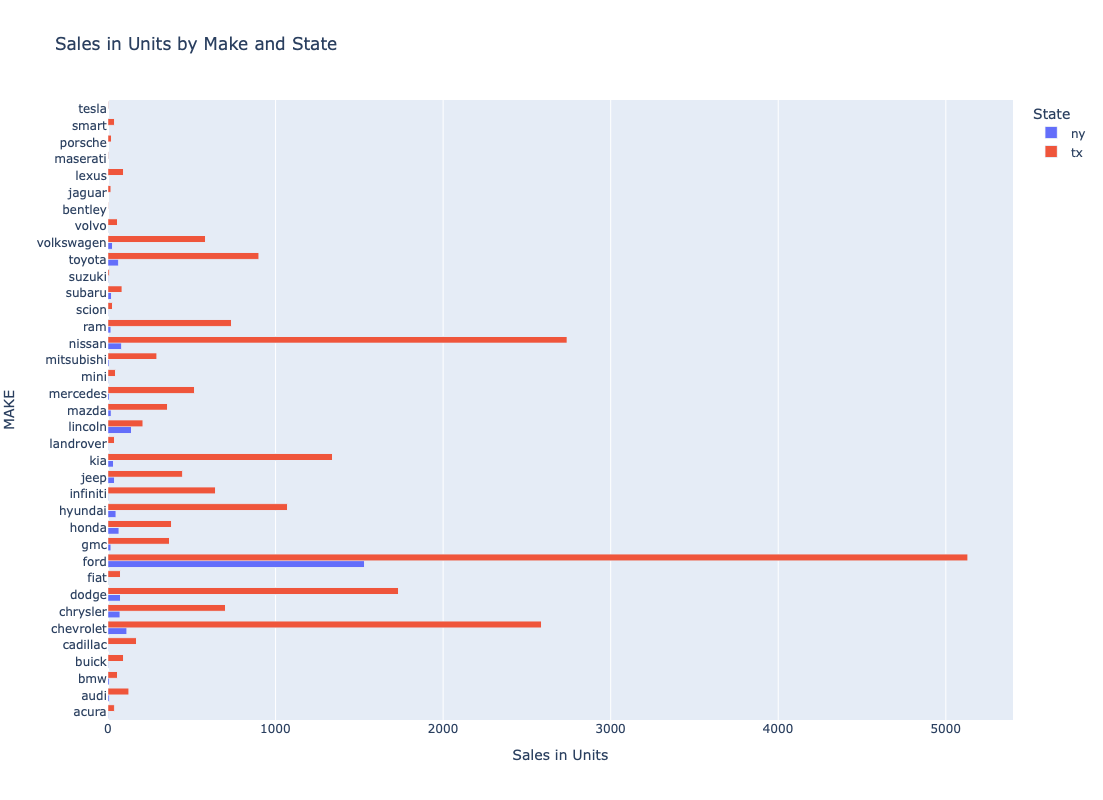

In [68]:
jsnbar =epx.bar(jsndt, orientation='h', barmode='group', title='Sales in Units by Make and State',labels={'Sales in Units': 'Sales in Units', 'make': 'MAKE', 'state': 'STATE'},
                color='state',y='make', x='Sales in Units')
jsnbar.update_layout(legend_title_text='State', width=1000, height=800)
jsnbar.show()

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- For the last 3 years of this dataset we can see that
- Car sales are significantly higher in Texas in comparison to New York. We can see that sales in Texas are triple the units sold in New York for all the car makers.
- In `both states` the sales of car maker `Ford` are the `best` of all.
- In `New York` `second` best sales is for the car maker `Lincoln`
- In `Texas`, `Nissan` has taken the second spot for sales in the last 3 years of data.
- In `Texas` Chevrolet is not too behind.
- With this data now my company knows which cars have the best sales in order for each state. With this data, my company can plan and purchase second-hand cars which had good demand so that customers get options for what was in demand. It will help them in managing and planning their inventory.

<a id='q2'></a>  
####     ❓ <span style="font-weight: bold;">2️⃣ What was the vehicle sales pattern by month for the last 5 years of the data?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will give them insigts of which which months of the year the vehicle purchase is more
2. This will help them to plan out the car purchange during these months so that they can provide more options to the buyers.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a  for my question 2 i.e. `dataset_q2`. I will filter the data for column year is past 5 year of it's max.
- Created a new column `sale_month_no` so that I can sort it based on month no.
- Then I am grouping the data based on sale_month, and also getting a count for each month. 
- Sort the values based on `sale_month_no`.
- I will create another  `data` jsndt2 `dataset_q1`, where I will group the data on `state` and `make` column and also get their count in `Sales in Units` column.

In [69]:
dataset_q2 = dataset.loc[(dataset['year'] >= (dataset['year'].max()-5))].copy()
dataset_q2['sale_month_no'] = dataset_q2['saledate'].dt.month
jsndt2 = dataset_q2.groupby ( ['sale_month','sale_month_no']).size().reset_index( name ='Sales in Units' )
jsndt2 = jsndt2.sort_values(by='sale_month_no').reset_index(drop=True)
jsndt2

,sale_month,sale_month_no,Sales in Units
0,January,1,78504
1,February,2,94009
2,March,3,26597
3,April,4,627
4,May,5,30679
5,June,6,62991
6,July,7,834
7,December,12,22312


- Here I will be using plotly to create a bar graph for us
- `fig` here is our Plotly figure object.
- `epx.bar()` is the function we will be using to plot the graph.
- `data` is the  we will be using for the figure.
- `x` - we need to specify the column we want to plot on x-axis, in this case it's `make`.
- `y` - we need to specify the column we want to plot on y-axis, in this case it's `Sales in Units`.
- `color` - is based on which the color coding will be done.
- `h` - is how we want to plot the bars. In this case h stands for horizontal
- `title` is the title of the figure.
- `labe's` - are the labels we want for each figure, in my case I have made it all caps for make and State.
- `legend_title_text` - is the title we want to set the title of the legend as.
- `width` and `height`is the pixel size of the figure. In this case 1300*1200px.

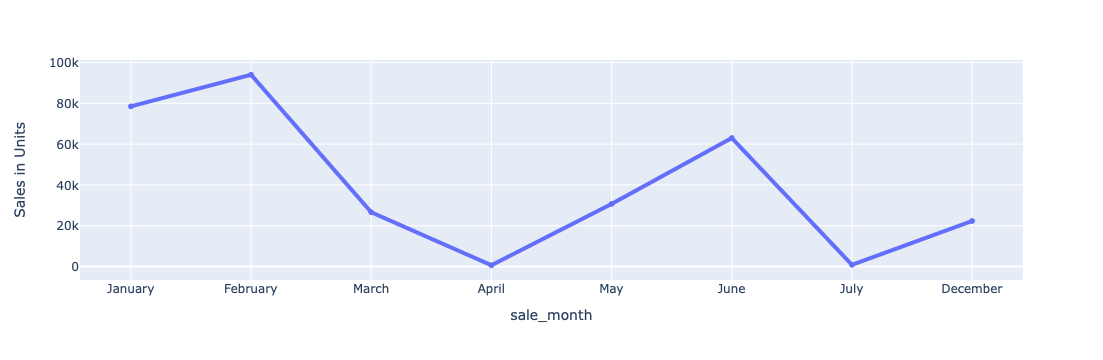

In [70]:
jsnlin = epx.line(jsndt2, x = 'sale_month', y='Sales in Units', markers=True)
jsnlin.update_traces(line={'width': 4})
jsnlin.show()

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- As we can in the diagram, the sales of the vehicles are high in the month of January, February and June.
- It is just below 80k units in January.
- The sales peak in February by 80k units.
- There is a decline from march to April.
- The sales rise steadily in May and June.
- And then there is a decline again.

- So, the company can hire more resources for sales so that they can make the maximum out of the customer buying behaviour. And they need to be mindful in April and July as the sales are 0 for these months.

<a id='q3'></a>  
####     ❓ <span style="font-weight: bold;">3️⃣ Which make and model are better conditioned for the car purchased 5 years ago?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will show us whether make and model have anything to do with the condition of the vehicles.
2. We will see which car and model has good condition.
3. This will help the company in setting the price of the cars. If a cars condition is better for most of the users means that the car is welll built and hence can be sold for for a higher price.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- To maintain a standard we will consider the data in which saledate is older than 5 years.
- I will first create a  for my question 2 i.e. `dataset_q2`. I will filter the data for column year is past 5 year of it's max.
- Created a new column `sale_month_no` so that I can sort it based on month no.
- Then I am grouping the data based on sale_month, and also getting a count for each month. 
- Sort the values based on `sale_month_no`.
- I will create another  `data` using `dataset_q1`, where I will group the data on `state` and `make` column and also get their count in `Sales in Units` column.

In [71]:
dataset_q3 = dataset.loc[(dataset['year'] <= (dataset['year'].max()-5)) & (dataset['year'] == (dataset['year'].max()-10))].copy()
jsndt3 = dataset_q3.groupby ( ['make'])['condition'].mean().reset_index( name ='Avg Condition' )
jsndt3['Avg Condition'] = jsndt3['Avg Condition'].round()
jsndt3 = jsndt3.sort_values(by='Avg Condition',  ascending=False).reset_index(drop=True)
jsndt3.head

<bound method NDFrame.head of           make  Avg Condition
0      bentley           36.0
1       hummer           34.0
2      porsche           30.0
3     mercedes           29.0
4         mini           28.0
5        lexus           28.0
6      lincoln           28.0
7       jaguar           28.0
8       subaru           28.0
9          bmw           27.0
10        jeep           26.0
11         gmc           26.0
12    cadillac           26.0
13        audi           26.0
14       volvo           26.0
15      toyota           25.0
16  volkswagen           25.0
17       acura           25.0
18    infiniti           25.0
19       buick           25.0
20        saab           24.0
21       mazda           24.0
22       honda           24.0
23     mercury           24.0
24        ford           24.0
25   chevrolet           24.0
26       scion           24.0
27    maserati           23.0
28    chrysler           23.0
29      saturn           23.0
30         kia           22.0
31      ni

- Here I will be using seaborn to create a bar graph for us
- `ppt` is pyplot
- I have set the dpi as 300
- best for seaborn sbrn I am passing our data `jsndt3`

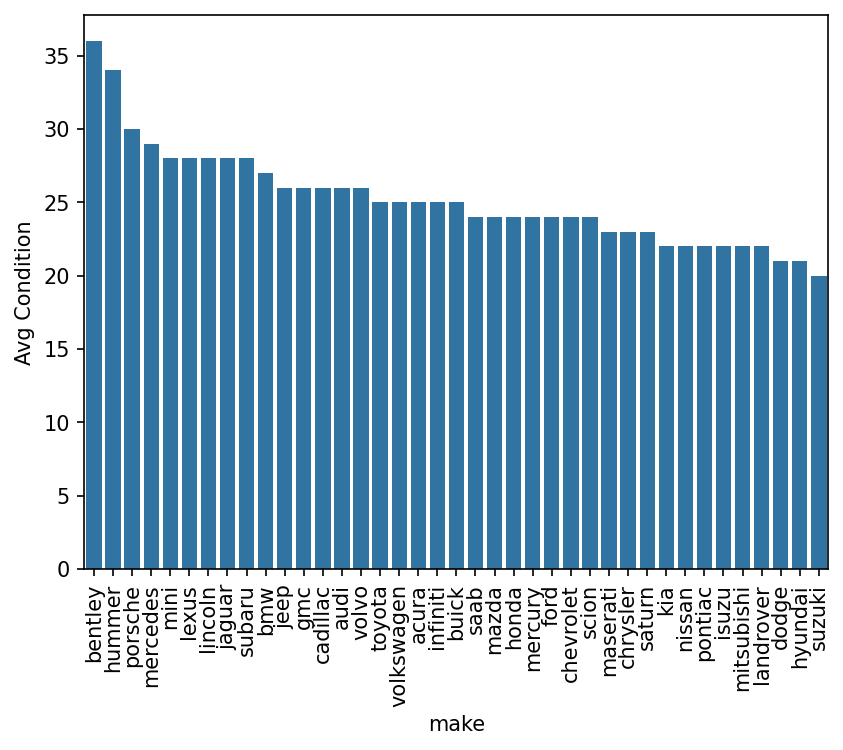

In [83]:
ppt.figure(dpi=150)
sbrn.barplot(jsndt3,y="Avg Condition", x="make")
ppt.xticks(rotation=90)
ppt.show()

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- As we can in the Bar chart, the dataset for cars brought in the year 2005
- Among all the car makers in average condition, Bently takes the crown being the best-maintained. The condition is the best at 36.
- And the second car maker was the Hummer at 34.
- Followed by Porche and Mercedes.

- With this chart, my company will be able to build a better price strategy for the car makers. Now that they know which car brands are the better lasting they can set higher prices.

<a id='q4'></a>  
####     ❓ <span style="font-weight: bold;">4️⃣ What propotion of SUV sales have been taken up by each vehicle colors?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will show us the color preference of the customers in the market for SUV body type.
2. This is will help the company is finding out what color is in demand.
3. This is also help them in setting the re-sale price according to the demand.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my question 4 i.e. `dataset_q4`. I will filter the data for body.
- Created a new column `propotion` which will have count of sales for each colors.
- I will create another dataset `color_propotion` using `dataset_q4`, where I will devide the column `propotion` by total units to find a percentage.
- And then we are going to present it in a form of pie chart.

In [73]:
dataset_q4 = dataset.loc[(dataset['body'].str.upper() == 'SUV'),['body','color']].copy()
dataset_q4
color_propotion = dataset_q4.groupby(['color']).size().reset_index()
color_propotion
color_propotion['propotion'] = color_propotion[0]
color_propotion
color_propotion.drop(0,axis=1,inplace=True)
total_vehicle_sales = dataset_q4.groupby(['body','color']).size().sum()
color_propotion['propotion'] = (color_propotion['propotion']/total_vehicle_sales)*100
color_propotion.sort_values(by='propotion', ascending=False)

,color,propotion
1,black,21.847100
17,white,17.321110
15,silver,15.014715
7,gray,14.273196
2,blue,8.132729
14,red,6.438066
19,—,4.982309
8,green,2.571755
6,gold,2.173302
4,burgundy,2.005489


- Here I will be using plotly to create a pie chart to represent the color propotions.

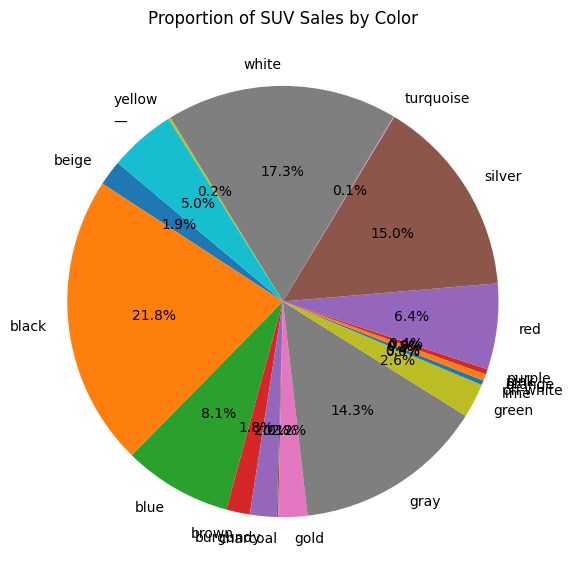

In [84]:
colors = color_propotion['color']
proportion = color_propotion['propotion']
ppt.figure(figsize=(7,7))
ppt.pie(proportion, labels=colors, autopct='%1.1f%%', startangle=140)
ppt.title('Proportion of SUV Sales by Color') 
ppt.show()


#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- The sale of color `black` is the most prominent, constituting of 21.8% of the sales.
- Followed by `white` and `silver` which is 17.32% and 15.0% of the sales respectively.
- With this pie chart we come to know the color preferences of the users.
- This will help the company in developing product, sales and inventory management decisions.

<a id='q5'></a>  
####     ❓ <span style="font-weight: bold;">5️⃣ What is the co-relation between odometer reading and the percentage decrease from selling price to MMR of the car?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will show us whether odometer reading have any connections for the MMR of the car.
2. This will help the company to set pricing strategies accordingly.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my question i.e. `dataset_q5`. I will filter the data for body.
- I will sample only the last 200 entries to simplify it for us.


In [75]:
dataset_q5 = dataset[['odometer','sellingprice','mmr']].sample(n=200, random_state=59)
# dataset_q5['price_decrease_percentage'] = round(((dataset['sellingprice'] - dataset['mmr'])/dataset['sellingprice'])*100)
dataset_q5

,odometer,sellingprice,mmr
292022,44778.0,13900.0,12750.0
283419,29330.0,8600.0,9850.0
395714,26078.0,14100.0,14050.0
252708,106485.0,7500.0,10250.0
136014,82415.0,2600.0,3300.0
...,...,...,...
271907,11667.0,20500.0,20700.0
96285,44078.0,11000.0,10850.0
236170,23009.0,14000.0,14900.0
33505,36118.0,27900.0,27500.0


- Here I will be using seaborn to create a scatter plotto represent the relationship.

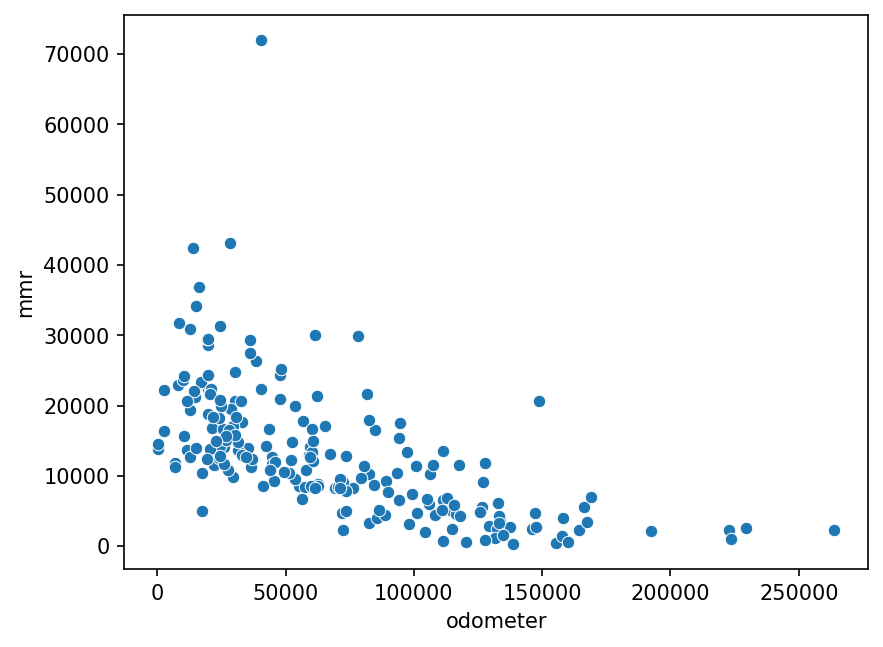

In [76]:
ppt.figure(dpi=150)
sbrn.scatterplot(data=dataset_q5, x="odometer", y="mmr")
ppt.show()

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- In this diagram, you can see that there is a clear relationship between selling price and odometer reading.
- By this figure, we can easily say that they are both inversely proportional.
- If the odometer reading is high then generally the selling price is low.
- If the odometer reading is low then generally the selling price is very high.
- With this details my company can clearly find what price needs to be set. They can put a linear regression an find an average price.

<a id='q6'></a>  
####     ❓ <span style="font-weight: bold;">6️⃣ Find if there is a relation between the condition of the vehicle and the MMR of the cars sold in the year 2014</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. This will show us whether odometer reading have any connections for the MMR of the car.
2. This will help the company to set pricing strategies accordingly.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my question i.e. `dataset_q5`. I will filter the data for body.
- I will sample only the last 200 entries to simplify it.


In [77]:
dataset_q6 = dataset[['condition', 'mmr']][dataset['sale_year'] == 2014]
dataset_q6

,condition,mmr
0,5.0,20500.0
1,5.0,20800.0
4,43.0,66000.0
5,1.0,15350.0
6,34.0,69000.0
...,...,...
75655,44.0,15950.0
75683,5.0,30800.0
75695,33.0,8925.0
75712,35.0,14900.0


- Here I will be using seaborn to create a scatter plot to represent the relationship.

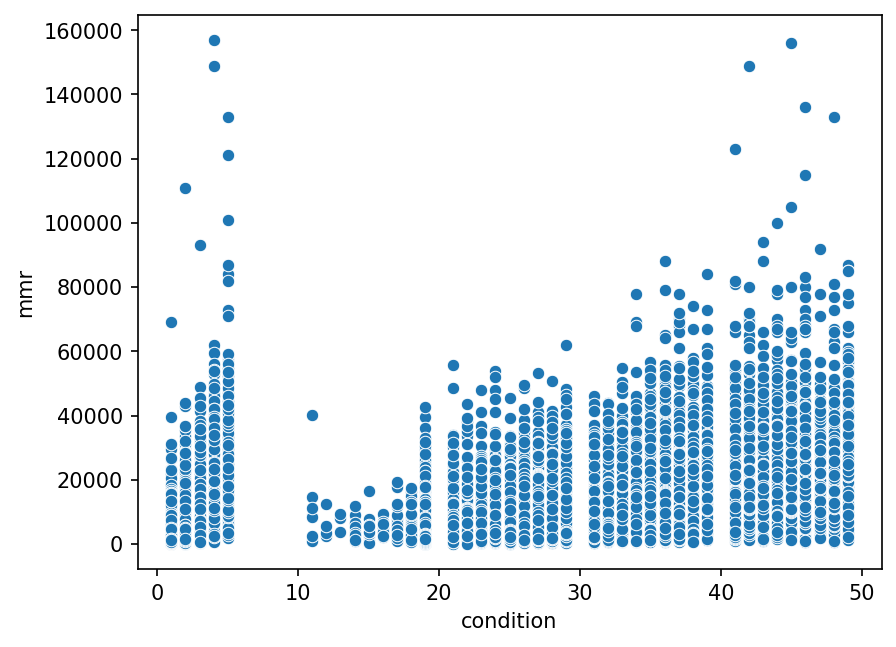

In [85]:
ppt.figure(dpi=150)
sbrn.scatterplot(data=dataset_q6, x="condition", y="mmr")
ppt.show()

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- In this diagram, we cannot see a clear connection between the condition of the vehicle and its market value of the car.
- There are cars where condition is low but the selling price is high as well.
- This is not giving us a clear picture.

<a id='q7'></a>  
####     ❓ <span style="font-weight: bold;">7️⃣ What is the interior color preference of the buyers for Mercedes, Lamborghini, Ford and Chevrolet made cars?</span>

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💎&nbsp;&nbsp;Significance</span>

1. Mercedes, Lamborghini, Ford and Chevrolet are the top resold cars for my company.
2. Hence they want to give their customer options based on their preference.
3. This will show us the preference for interior colour.
4. When reselling the cars my company usually modifies and at this time if they have this data they will able to attract our customers better by giving the option of colours which they like.

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📟&nbsp;&nbsp;Code</span>

- I will first create a dataset for my question i.e. `dataset_q5`. I will filter the data for for the makers.

In [79]:
dataset_q7 = dataset[['make', 'interior']][dataset['make'].isin(['mercedes','lamborghini','ford','chevrolet'])]
dataset_q7

,make,interior
7,chevrolet,black
9,chevrolet,black
12,ford,beige
18,chevrolet,black
20,chevrolet,black
...,...,...
558818,chevrolet,black
558821,ford,gray
558822,mercedes,black
558823,chevrolet,black


- Here I will be using seaborn violin chart to  plot and represent the preference.

<Axes: xlabel='make', ylabel='interior'>

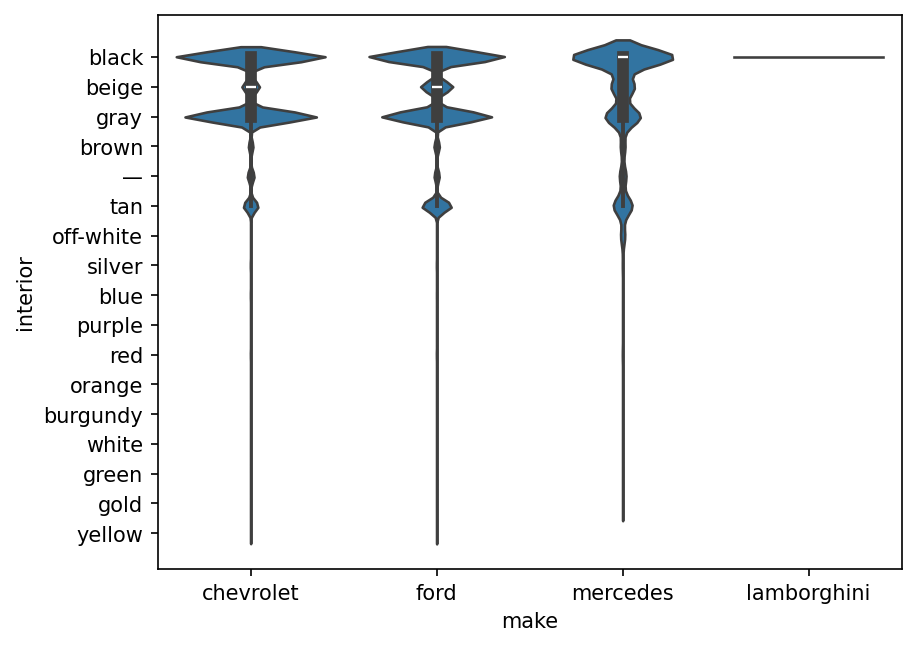

In [86]:
ppt.figure(dpi=150)
sbrn.violinplot(data=dataset_q7, x="make", y="interior")

#####  <span style="font-weight: bold;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;💬&nbsp;&nbsp;Findings</span>

- In this diagram, we can see that there is a clear preference of black-colored interior.
- For lamborghini we have very less data to analyze, but out of what we have only black color interiors are preffered.
- And the second most preffered color for chevrolet, ford and mercedes is color grey.

<a id='conclusion'></a>
## 💡 <span style="color: #20479b; font-weight: bold;">Conclusion</span>

To summarize everything we did
- we started with loading the dataset
- In our EDA, we noticed that the data we are working on was not very clean
- We have to preprocess our data before we start to work with our business data.

To conclude from the insights we got from the dataset, here is a summary,
1. Texas sales were much higher than that of New York. And form sales performed the best in both the states.
2. Sales were very high in Jan, Feb and June and low in July and Apr.
3. Bentry took the crown as being the best-maintained car of all.
4. We saw an inverse relationship between the odometer reading and the MMR of the car.
5. Most of the customers preferred black or grey interiors in their vehicles, with black being the favourite.